In [1]:
import os

In [2]:
os.getcwd()

'x:\\Ineuron_ML_Projects\\Rate_predict_EndtoEnd_ML_project\\Notebook'

In [3]:
os.chdir("x:\\Ineuron_ML_Projects\\Rate_predict_EndtoEnd_ML_project")

In [4]:
os.getcwd()

'x:\\Ineuron_ML_Projects\\Rate_predict_EndtoEnd_ML_project'

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use("dark_background")

## Display of columns and rows in output
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", 100)

## Styling for visualization
%matplotlib inline
plt.style.use("dark_background")
Tfont = {'family':'serif','color':'w','size':18, 'weight':'bold'}
Lfont = {'family':'monospace','color':'lime','size':15}


## Ignoring Warning
import warnings
warnings.filterwarnings("ignore")

In [6]:
orig_data = pd.read_csv("dataset/zomato.csv")

In [7]:
data=orig_data.copy()

In [8]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
data.shape

(51717, 17)

In [10]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# __Data Cleaning__

In [11]:
## DELETING USELESS COLUMNS
## lets remove completely-useless columns first.
## These dont give any relation with targetVariable and nor these can be used to derive new usefull column.
uselesscol=['url', 'phone', 'reviews_list', 'menu_item', 'listed_in(city)']
data[uselesscol]

,url,phone,reviews_list,menu_item,listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,080 42297555\r\n+91 9743772233,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,080 41714161,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,+91 9663487993,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,+91 9620009302,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Banashankari
4,https://www.zomato.com/bangalore/grand-village...,+91 8026612447\r\n+91 9901210005,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Banashankari
...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,080 40301477,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,+91 8197675843,[],[],Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,NaN,[],[],Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,080 49652769,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Whitefield


##### Reason to remove the useless column:

1. url---> irrelevant data

2. phone---> irrelevant data

3. review_list---> irrelevant data

4. menu_item ----> too many empty list

5. listed_in(city)---> giving redundant info as address or location.

In [12]:
data.drop(columns=uselesscol, axis=1, inplace=True)

In [13]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [14]:
data.describe(include='all')

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
count,51717,51717,51717,51717,43942,51717.000000,51696,51490,23639,51672,51371,51717
unique,11495,8792,2,2,64,NaN,93,93,5271,2723,70,7
top,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,BTM,Quick Bites,Biryani,North Indian,300,Delivery
freq,128,96,30444,45268,2208,NaN,5124,19132,182,2913,7576,25942
mean,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   dish_liked                   23639 non-null  object
 9   cuisines                     51672 non-null  object
 10  approx_cost(for two people)  51371 non-null  object
 11  listed_in(type)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


> 1. So there are many __missing values__ in columns like __rate, location, dish_liked, rest_type, cuisines, approx_cost(for two people)__.

> 2. dtypes of many features are not correct.

> 3. We will also see if there are any chance of dropping some more useless column in further analysis.

## Renaming two columns

In [16]:
## Lets change some names of columns which are two large:
data.rename(columns={"approx_cost(for two people)":"avg_cost","listed_in(type)":"type"}, inplace=True)

In [17]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


## Checking Missing Values in features

In [18]:
feature_withNA = [features for features in data.columns if data[features].isnull().sum()>0]

In [19]:
## % Amount of missing values
for features in feature_withNA:
    amt = data[features].isnull().sum()
    val= amt/data.shape[0] * 100
    perc=np.round(val,2)
    print(f"{features} has {perc}% missing value")

rate has 15.03% missing value
location has 0.04% missing value
rest_type has 0.44% missing value
dish_liked has 54.29% missing value
cuisines has 0.09% missing value
avg_cost has 0.67% missing value


# In-depth Analysis of each column

In [20]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


### column: rest_type vs type

In [21]:
## lets see the count in type and rest_type
## Bcoz both giving similar knowledge
data['type'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: type, dtype: int64

In [22]:
data["rest_type"].value_counts()

Quick Bites                      19132
Casual Dining                    10330
Cafe                              3732
Delivery                          2604
Dessert Parlor                    2263
Takeaway, Delivery                2037
Casual Dining, Bar                1154
Bakery                            1141
Beverage Shop                      867
Bar                                697
Food Court                         624
Sweet Shop                         468
Bar, Casual Dining                 425
Lounge                             396
Pub                                357
Fine Dining                        346
Casual Dining, Cafe                319
Beverage Shop, Quick Bites         298
Bakery, Quick Bites                289
Mess                               267
Pub, Casual Dining                 255
Sweet Shop, Quick Bites            178
Kiosk                              176
Dessert Parlor, Cafe               175
Cafe, Casual Dining                173
Cafe, Bakery             

> Since type has only __7 dimensions__ but rest_type has __93 dimension__ and that also jumbled [(like Dessert Parlor, Kiosk), (Food Court, Beverage Shop), etc.]. So to avoid __high dimensionality__ we can go for __type__ column rather than rest_type column.

In [23]:
data.drop(columns='rest_type', inplace=True)

### column: address Vs. location

In [24]:
data[["address", "location"]].head()

,address,location
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Basavanagudi


In [25]:
## We already made up our mind to address and keep location column
## So first lets use that address column to fill any missing value if we can
data[data.location.isnull()==True]

,address,name,online_order,book_table,rate,votes,location,dish_liked,cuisines,avg_cost,type
1662,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,Delivery
9874,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,Delivery
13693,"Chandapura- Anakal Main Road, Oppsite Vemana H...",Mohabbat Desi Restaurant,No,No,NaN,0,NaN,NaN,NaN,NaN,Delivery
16351,"Kudlu Gate, Bommanahalli, Bangalore",Desi Chatkara,No,No,NaN,0,NaN,NaN,NaN,NaN,Delivery
26432,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",New Taj Biryani Centre,No,No,NaN,0,NaN,NaN,NaN,NaN,Dine-out
26519,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,NaN,0,NaN,NaN,NaN,NaN,Buffet
27672,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,NaN,0,NaN,NaN,NaN,NaN,Delivery
28611,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,NaN,0,NaN,NaN,NaN,NaN,Dine-out
29298,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,NaN,0,NaN,NaN,NaN,NaN,Buffet
30604,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,NaN,0,NaN,NaN,NaN,NaN,Delivery


In [26]:
data['location'].isnull().value_counts()

False    51696
True        21
Name: location, dtype: int64

> Since there are only 21 NaN values in location we can fill it manually.

In [27]:
## list of nan indix in location
na_indices=[]
nan=data.location.isnull()
for index, val in enumerate(nan):
    if (val==True):
        na_indices.append(index)

In [28]:
na_indices

[1662,
 9874,
 13693,
 16351,
 26432,
 26519,
 27672,
 28611,
 29298,
 30604,
 31400,
 32131,
 33457,
 34755,
 40354,
 40556,
 41980,
 46586,
 46609,
 46752,
 47134]

In [29]:
## handling missing values in location
## filling values from address column into location column where nan is present
for i in na_indices:
    l=data["address"][i].split(sep=",")[-2].strip()
    #print(type(l))
    data.loc[i,"location"]=l

In [30]:
data.location.isna().sum()

0

In [31]:
data.location.value_counts()

BTM                              5124
HSR                              2523
Koramangala 5th Block            2504
JP Nagar                         2235
Whitefield                       2144
Indiranagar                      2083
Jayanagar                        1926
Marathahalli                     1848
Bannerghatta Road                1630
Bellandur                        1286
Electronic City                  1259
Koramangala 1st Block            1238
Brigade Road                     1218
Koramangala 7th Block            1181
Koramangala 6th Block            1160
Sarjapur Road                    1065
Ulsoor                           1023
Koramangala 4th Block            1018
MG Road                           918
Banashankari                      906
Kalyan Nagar                      854
Richmond Road                     812
Frazer Town                       727
Malleshwaram                      725
Basavanagudi                      684
Residency Road                    675
Banaswadi   

In [32]:
## so now lets drop address column too 
## as location column serve the same purpose with less dimensionality
data.drop(columns="address", inplace=True)

In [33]:
data.head()

,name,online_order,book_table,rate,votes,location,dish_liked,cuisines,avg_cost,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [34]:
data.reset_index(drop=True)

,name,online_order,book_table,rate,votes,location,dish_liked,cuisines,avg_cost,type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,NaN,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,NaN,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,NaN,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield","Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars


In [35]:
data.location.value_counts()

BTM                              5124
HSR                              2523
Koramangala 5th Block            2504
JP Nagar                         2235
Whitefield                       2144
Indiranagar                      2083
Jayanagar                        1926
Marathahalli                     1848
Bannerghatta Road                1630
Bellandur                        1286
Electronic City                  1259
Koramangala 1st Block            1238
Brigade Road                     1218
Koramangala 7th Block            1181
Koramangala 6th Block            1160
Sarjapur Road                    1065
Ulsoor                           1023
Koramangala 4th Block            1018
MG Road                           918
Banashankari                      906
Kalyan Nagar                      854
Richmond Road                     812
Frazer Town                       727
Malleshwaram                      725
Basavanagudi                      684
Residency Road                    675
Banaswadi   

In [36]:
## LOCATION
## There too many location which has only few restaurants, to resolve this restaurant < 250 in any
## particular location will be termed as others
#locations = data.location.value_counts()
#locations_lessthan_250 = locations[locations<250]
#def handle_locations(value):
#       if value in locations_lessthan_250:
#            return "others"
#        else:
#            return value

#data['location']=data['location'].apply(handle_locations)

### column: Rate

In [37]:
data.rate.value_counts(dropna=False)

NaN       7775
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
3.7 /5    1810
3.6/5     1773
4.0/5     1609
4.0 /5    1574
3.6 /5    1543
4.1 /5    1474
4.1/5     1474
3.5/5     1431
3.5 /5    1353
3.4/5     1259
3.4 /5    1217
3.3/5     1168
4.2 /5    1165
3.3 /5    1142
4.2/5     1019
3.2/5     1006
4.3 /5     917
3.2 /5     867
3.1/5      862
4.3/5      776
3.1 /5     699
4.4 /5     628
3.0/5      558
4.4/5      519
3.0 /5     465
2.9/5      427
4.5 /5     409
2.9 /5     375
2.8/5      313
2.8 /5     287
4.5/5      247
4.6 /5     175
2.7/5      170
2.6/5      143
2.7 /5     137
4.6/5      125
2.6 /5     117
4.7 /5      86
4.7/5       81
-           69
2.5 /5      56
2.5/5       45
4.8 /5      43
2.4/5       40
2.4 /5      30
4.9 /5      30
2.3/5       28
4.9/5       25
4.8/5       23
2.3 /5      23
2.2/5       19
2.1 /5      13
2.1/5       11
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, dtype: int64

In [38]:
## Lets change the look of rate from 4.1/5 to 4.1 and '-' to "NEW" and strip all whitespace
data['rate'].astype("str")
data["rate"]=data['rate'].str.replace('/5','').str.replace('-','NEW').str.strip()
data.rate.value_counts(dropna=False)

NaN    7775
3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
NEW    2277
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

In [39]:
## first let's fill all NaN with NEW
data.rate=data['rate'].fillna("NEW")

In [40]:
##confirming null values
data.rate.isnull().value_counts()

False    51717
Name: rate, dtype: int64

In [41]:
data.reset_index(drop=True, inplace=True)

### column: avg_cost

In [42]:
data.avg_cost.value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
250      2959
800      2285
150      2066
700      1948
350      1763
1,000    1637
450      1417
100       993
1,200     993
1,500     971
650       776
550       761
750       758
900       700
1,300     516
1,100     512
1,400     473
2,000     363
1,600     266
1,700     247
1,800     203
850       166
3,000     162
2,500     146
2,200      78
1,900      70
2,100      67
950        62
2,800      45
4,000      29
3,500      25
120        24
2,400      23
180        20
1,350      18
3,400      13
2,300      11
80         10
2,600      10
230        10
1,250       9
40          8
50          8
130         8
1,650       6
1,450       5
330         4
1,050       4
4,100       4
199         4
2,700       3
70          3
140         2
240         2
190         2
360         2
4,500       2
6,000       2
3,200       2
469         1
160         1
60          1
560         1
3,700       1
5,000       1
Name: avg_cost, dtyp

In [43]:
data["avg_cost"].astype('str')
data.avg_cost = data.avg_cost.str.replace(',', '').str.replace(" ","")

In [44]:
data.avg_cost.value_counts()

300     7576
400     6562
500     4980
200     4857
600     3714
250     2959
800     2285
150     2066
700     1948
350     1763
1000    1637
450     1417
100      993
1200     993
1500     971
650      776
550      761
750      758
900      700
1300     516
1100     512
1400     473
2000     363
1600     266
1700     247
1800     203
850      166
3000     162
2500     146
2200      78
1900      70
2100      67
950       62
2800      45
4000      29
3500      25
120       24
2400      23
180       20
1350      18
3400      13
2300      11
230       10
80        10
2600      10
1250       9
40         8
50         8
130        8
1650       6
1450       5
199        4
4100       4
330        4
1050       4
2700       3
70         3
140        2
190        2
240        2
4500       2
3200       2
6000       2
360        2
5000       1
469        1
3700       1
160        1
60         1
560        1
Name: avg_cost, dtype: int64

In [45]:
data.avg_cost.isnull().value_counts()

False    51371
True       346
Name: avg_cost, dtype: int64

In [46]:
data[data['avg_cost'].isnull()]

,name,online_order,book_table,rate,votes,location,dish_liked,cuisines,avg_cost,type
1662,Papa Khan Rasoi,No,No,NEW,0,Bommanahalli,NaN,NaN,NaN,Delivery
1768,Innate,No,No,NEW,0,JP Nagar,NaN,Beverages,NaN,Delivery
1795,Super Chef's (New Royal treat),No,No,NEW,0,Bannerghatta Road,NaN,"North Indian, Chinese, South Indian",NaN,Delivery
3069,Super Chef's (New Royal treat),No,No,NEW,0,Bannerghatta Road,NaN,"North Indian, Chinese, South Indian",NaN,Delivery
3774,The Hub - Ibis Bengaluru,No,No,3.9,237,Marathahalli,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,Buffet
...,...,...,...,...,...,...,...,...,...,...
50940,Cinnabon,No,No,4.0,80,Whitefield,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,Desserts
51233,Mayas kitchen,No,No,NEW,0,Whitefield,NaN,"South Indian, Chinese, Chettinad",NaN,Dine-out
51247,Mast Kalandar,No,No,2.6,76,Whitefield,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,Dine-out
51271,Karavalli Food Court,No,No,3.2,4,Whitefield,NaN,South Indian,NaN,Dine-out


In [47]:
data.dropna(subset=["avg_cost"],inplace=True)

In [48]:
data.reset_index(drop=True, inplace=True)

In [49]:
data.avg_cost = data.avg_cost.astype('int')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51371 entries, 0 to 51370
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51371 non-null  object
 1   online_order  51371 non-null  object
 2   book_table    51371 non-null  object
 3   rate          51371 non-null  object
 4   votes         51371 non-null  int64 
 5   location      51371 non-null  object
 6   dish_liked    23503 non-null  object
 7   cuisines      51352 non-null  object
 8   avg_cost      51371 non-null  int32 
 9   type          51371 non-null  object
dtypes: int32(1), int64(1), object(8)
memory usage: 3.7+ MB


### column: cuisines

In [51]:
## CUISINES
## handling high dimensionality
## cuisines which are served in less than 100 restaurants are treated as others
#cuisines_count=data.cuisines.value_counts()
#cuisines_lessthan100 = cuisines_count[cuisines_count<100]

#def handle_cuisines(value):
#    if value in cuisines_lessthan100:
#        return 'others'
#    else:
#        return value
#data['cuisines']=data['cuisines'].apply(handle_cuisines)

data.cuisines.isnull().value_counts()

False    51352
True        19
Name: cuisines, dtype: int64

In [52]:
## handling missing values
#data.cuisines.fillna('UNKNOWN', inplace=True)

In [53]:
data.cuisines.value_counts(dropna=False)

North Indian                                      2872
North Indian, Chinese                             2377
South Indian                                      1822
Biryani                                            915
Bakery, Desserts                                   903
                                                  ... 
South Indian, Fast Food, Chinese, North Indian       1
Biryani, Kebab, Kerala                               1
Fast Food, Street Food, North Indian, Biryani        1
Beverages, Juices, Ice Cream, Fast Food              1
Seafood, Chinese, South Indian                       1
Name: cuisines, Length: 2716, dtype: int64

# Function to return number of elements in a row of specific column ####

In [54]:
def element_counter(inpStr):
    if type(inpStr)==float:
        return 0
    else:
        count=len(str(inpStr).split(","))
        return count

In [55]:
##### For cuisisnes 
data['Count_cuisines']= data['cuisines'].apply(element_counter)

In [56]:
##### for dish_liked
data['Count_dishes']= data['dish_liked'].apply(element_counter)

In [57]:
data.head()

,name,online_order,book_table,rate,votes,location,dish_liked,cuisines,avg_cost,type,Count_cuisines,Count_dishes
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,3,7
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,3,7
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,3,7
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Masala Dosa,"South Indian, North Indian",300,Buffet,2,1
4,Grand Village,No,No,3.8,166,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,2,2


In [58]:
data.Count_cuisines.value_counts()

2    17835
1    12271
3    12124
4     5854
5     2026
6      680
7      372
8      190
0       19
Name: Count_cuisines, dtype: int64

In [59]:
data.Count_dishes.value_counts()

0    27868
7    13780
2     2015
3     1827
1     1752
4     1579
5     1350
6     1200
Name: Count_dishes, dtype: int64

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51371 entries, 0 to 51370
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            51371 non-null  object
 1   online_order    51371 non-null  object
 2   book_table      51371 non-null  object
 3   rate            51371 non-null  object
 4   votes           51371 non-null  int64 
 5   location        51371 non-null  object
 6   dish_liked      23503 non-null  object
 7   cuisines        51352 non-null  object
 8   avg_cost        51371 non-null  int32 
 9   type            51371 non-null  object
 10  Count_cuisines  51371 non-null  int64 
 11  Count_dishes    51371 non-null  int64 
dtypes: int32(1), int64(3), object(8)
memory usage: 4.5+ MB


# Handling outliers

array([[<AxesSubplot:title={'center':'avg_cost'}>,
        <AxesSubplot:title={'center':'votes'}>]], dtype=object)

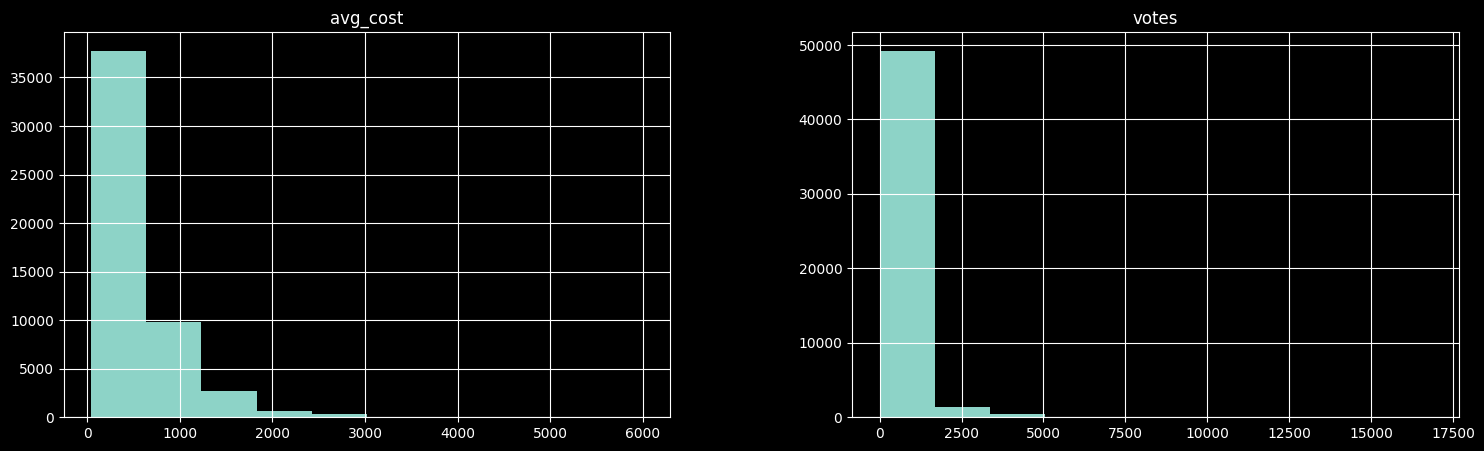

In [61]:
data.hist(column=['avg_cost','votes'], figsize=(18,5))

<AxesSubplot:>

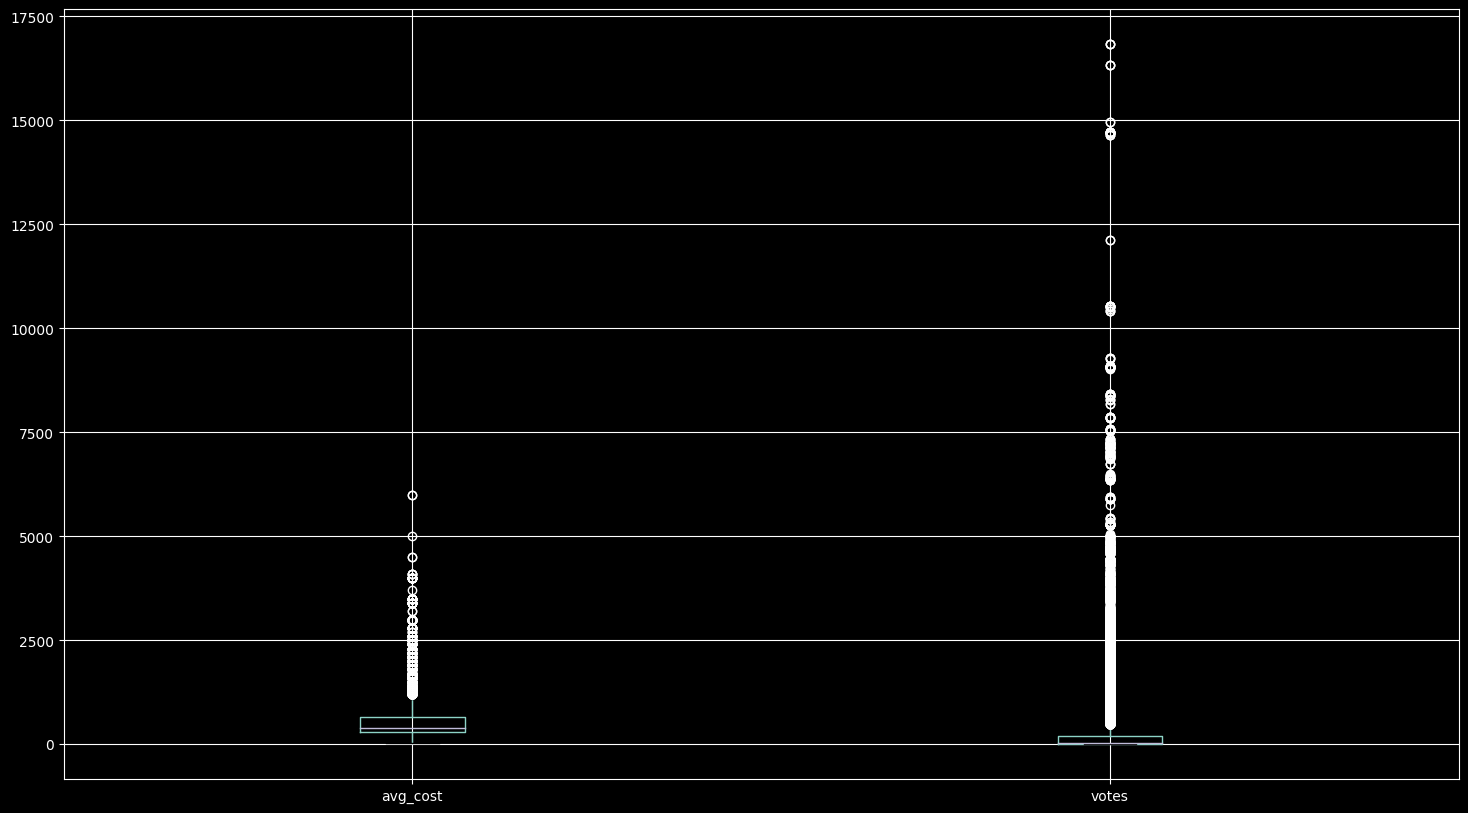

In [62]:
data.boxplot(column=['avg_cost', 'votes'], figsize=(18,10))

> From __boxplot__ and __barchart__ we same to conclusion that we need to handle outlier in __avg_cost__ and __votes__, as avg_cost has value more than 6000 and votes has value more than 15000. 

> __avg_cost__ > 3000 must be substituted with optimal value.

> __votes__ > 7500 must be substituted with optimal value.

In [63]:
## first selecting votes value which is nearest to 7500 
data['votes'][data['votes']<7500].sort_values(ascending=False)

49301    7330
49729    7330
48947    7330
49748    7330
40287    7284
         ... 
23199       0
23200       0
23202       0
23204       0
16336       0
Name: votes, Length: 51269, dtype: int64

> 7330 value is selected for vote to rid of outliers.

In [64]:
# replacing i=outliers with nearest possible values
data['votes'][data['votes']>7500]= 7330

In [65]:
## for __avg_cost__ selecting value which is nearest to 3000 
data["avg_cost"][data['avg_cost']<3000].sort_values(ascending=False)

42951    2800
48290    2800
6623     2800
13218    2800
48356    2800
         ... 
29650      40
5259       40
12201      40
14778      40
32328      40
Name: avg_cost, Length: 51130, dtype: int32

> 2880 value is selected for vote to rid of outliers.

In [66]:
data["avg_cost"][data["avg_cost"]>3000]=2880

array([[<AxesSubplot:title={'center':'avg_cost'}>,
        <AxesSubplot:title={'center':'votes'}>]], dtype=object)

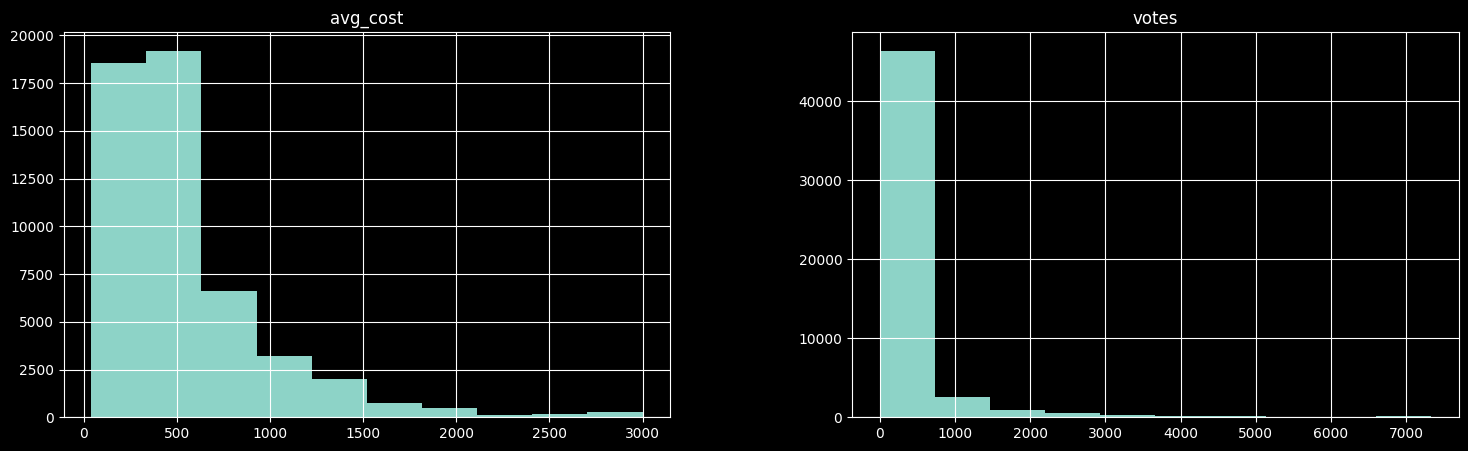

In [67]:
## checking distribution after removal of outliers
data.hist(column=['avg_cost','votes'], figsize=(18,5))

> Distribution of __avg_cost__ and __votes__ are now look better.

## As all the missing values and outliers are dealt with lets jump into visualization 

# __Data Visualization__

### Distribution of Restaurant Rating

In [68]:
# cleaning rating 
df_clean = data[data["rate"]!= "NEW"].copy()

# converting rate dtype to float
df_clean['rate']= pd.to_numeric(df_clean['rate'], downcast='float')

In [69]:
df_clean['rate'].value_counts()

3.9    3961
3.8    3825
3.7    3812
3.6    3313
4.0    3151
4.1    2928
3.5    2780
3.4    2454
3.3    2286
4.2    2155
3.2    1864
4.3    1683
3.1    1556
4.4    1146
3.0    1011
2.9     801
4.5     656
2.8     600
2.7     306
4.6     300
2.6     255
4.7     167
2.5     100
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

Text(0.5, 1.0, 'Distribution of Restaurant Rating')

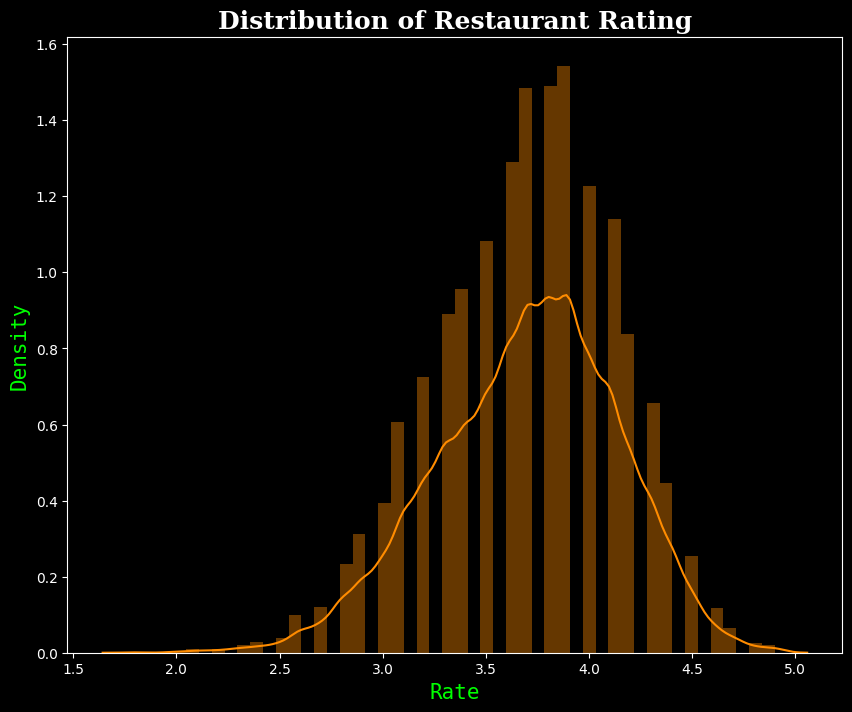

In [70]:
## distribution of rate
plt.figure(figsize=(10,8))
sns.distplot(df_clean['rate'], color='darkorange')
plt.xlabel("Rate", fontdict=Lfont)
plt.ylabel("Density", fontdict=Lfont)
plt.title("Distribution of Restaurant Rating", fontdict=Tfont)

> Rating of the restaurants shows __Normal distribution__.

In [71]:

df_clean.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'dish_liked', 'cuisines', 'avg_cost', 'type', 'Count_cuisines',
       'Count_dishes'],
      dtype='object')

In [72]:
df_clean.head()

,name,online_order,book_table,rate,votes,location,dish_liked,cuisines,avg_cost,type,Count_cuisines,Count_dishes
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,3,7
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,3,7
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,3,7
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Masala Dosa,"South Indian, North Indian",300,Buffet,2,1
4,Grand Village,No,No,3.8,166,Basavanagudi,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,2,2


## Distribution of Vote of restaurants

Text(0.5, 1.0, 'Distribution of Restaurant Votes')

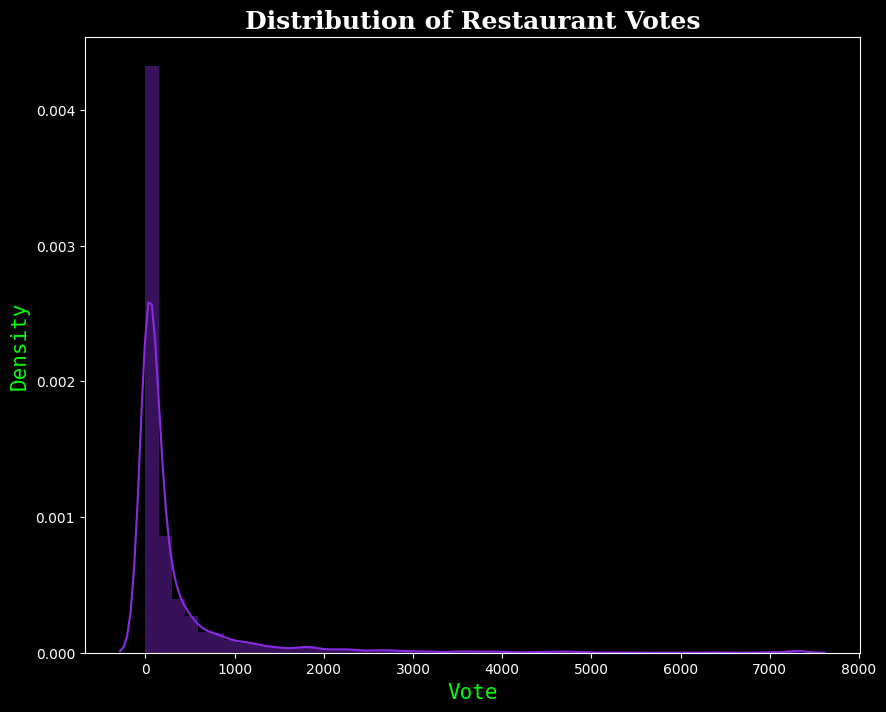

In [73]:
plt.figure(figsize=(10,8))
sns.distplot(df_clean['votes'], color='blueviolet')
plt.xlabel("Vote", fontdict=Lfont)
plt.ylabel("Density", fontdict=Lfont)
plt.title("Distribution of Restaurant Votes", fontdict=Tfont)

## Distribution of avg_cost of restaurants

Text(0.5, 1.0, 'Distribution of Restaurant Avg_cost')

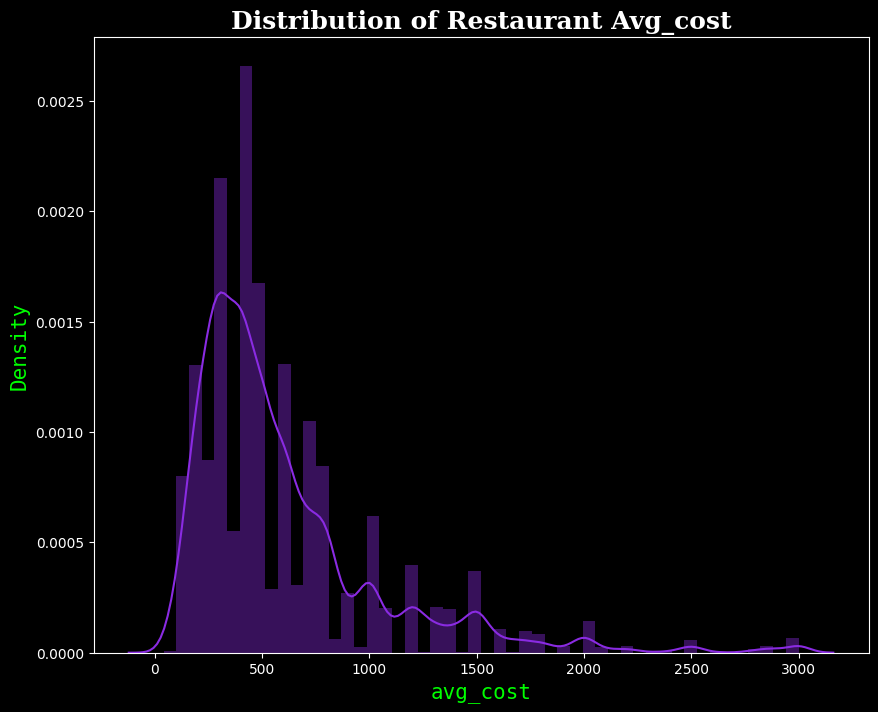

In [74]:
plt.figure(figsize=(10,8))
sns.distplot(df_clean['avg_cost'], color='blueviolet')
plt.xlabel("avg_cost", fontdict=Lfont)
plt.ylabel("Density", fontdict=Lfont)
plt.title("Distribution of Restaurant Avg_cost", fontdict=Tfont)

> Since both __votes and avg_cost has somewhat skewness__, we will first confirm  more accurately and then do transfromation if its needed.

In [75]:
## Since boxcox wont allow values<=0.0
df_clean.drop(df_clean['votes'][df_clean['votes']==0].index, inplace=True)

In [76]:
## Calculating Skewdness and how heavily the outliers are
## skewness and heaviness along the index axis
def CalcSkew(dataframe):
    Skew_values = dataframe.skew(axis = 0)
    kurtosis_value = dataframe.kurtosis(axis =0)
    d = {"Skewness":Skew_values, "Kurtosis":kurtosis_value}
    df_SkewCalc = pd.DataFrame(d,index=['online_order', 'book_table', 'rate', 'votes', 'avg_cost','Count_cuisines', 'Count_dishes'])
    return df_SkewCalc


In [77]:
CalcSkew(df_clean)

,Skewness,Kurtosis
online_order,NaN,NaN
book_table,NaN,NaN
rate,-0.326803,-0.006639
votes,4.939964,30.946921
avg_cost,2.149101,6.022189
Count_cuisines,1.024649,1.424984
Count_dishes,0.256445,-1.755288


> So it cames that our intuition was right. Our main aim is to transform __votes and avg_cost__ from __log normal to normal distribution__

In [78]:
## Transforming from log-normal to normal distribution
from scipy.stats import boxcox as bcx

## Transforming votes distribution
transform_votes= bcx(df_clean['votes'], 0.0)
df_clean['votes_transformed']=transform_votes

## Transforming avg_cost distribution
transform_avg_cost= bcx(df_clean['avg_cost'], 0.0)
df_clean['avg_cost_transformed']=transform_avg_cost



Text(0.5, 1.0, 'Distribution of Average_Cost')

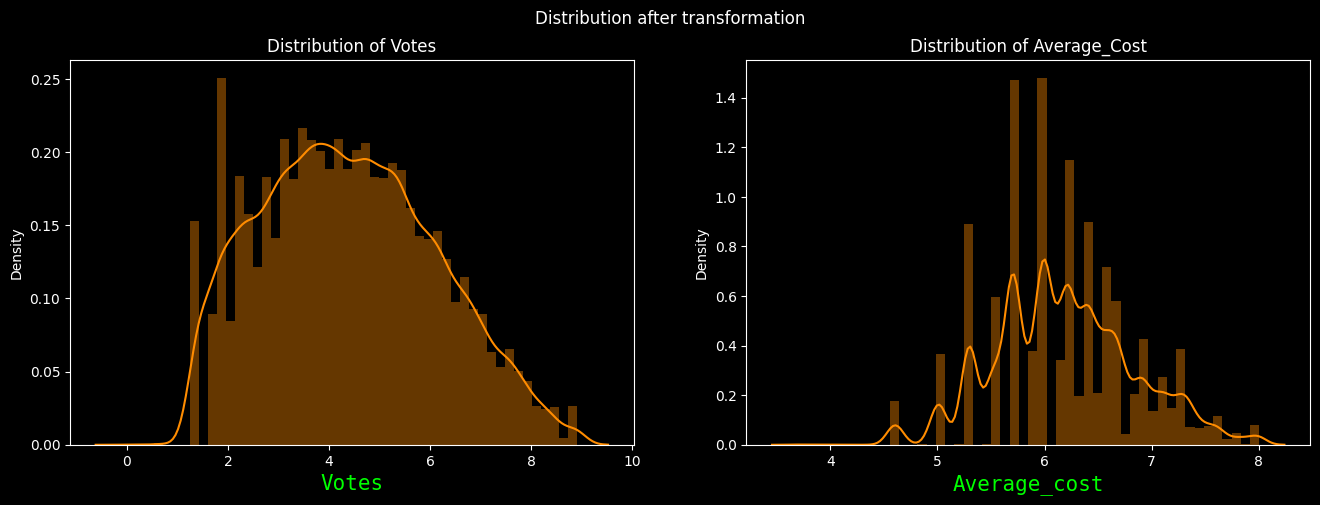

In [79]:
## Plotting disribution diagram
plt.figure(figsize=(16,5))
plt.suptitle("Distribution after transformation")

# plot-1
plt.subplot(121)
sns.distplot(df_clean['votes_transformed'], color= 'darkorange')
plt.xlabel("Votes", fontdict=Lfont)
plt.title('Distribution of Votes')

# plot-2
plt.subplot(122)
sns.distplot(df_clean['avg_cost_transformed'], color= 'darkorange')
plt.xlabel("Average_cost", fontdict=Lfont)
plt.title('Distribution of Average_Cost')


> Now these distribution look much better than previous and somwhat tends towards normal distribution. 

#### Lets check Skewness and kurtosis too.

In [80]:
df_clean[['votes_transformed',"avg_cost_transformed"]].agg(['skew', 'kurtosis'])

,votes_transformed,avg_cost_transformed
skew,0.253744,0.18495
kurtosis,-0.658575,-0.07547


> Much better than previously, now these values are in acceptable range.

In [81]:
## removig and changing the names of transformed column. 
df_clean.drop(columns=['votes','avg_cost'], inplace=True)
df_clean.rename(columns={"votes_transformed":"votes","avg_cost_transformed":"avg_cost"}, inplace=True)

# No. of restaurants vs location

In [116]:
df = df_clean['location'].value_counts()
df = pd.DataFrame(df)
df.rename(columns={'location':'index', 'location':'total_restaurants'}, inplace=True)
df.reset_index(inplace=True)
df.head()

,index,total_restaurants
0,BTM,3905
1,Koramangala 5th Block,2297
2,HSR,2004
3,Indiranagar,1803
4,JP Nagar,1708


In [118]:
## Top 30 retaurants hub
df_trimed = df.head(30)

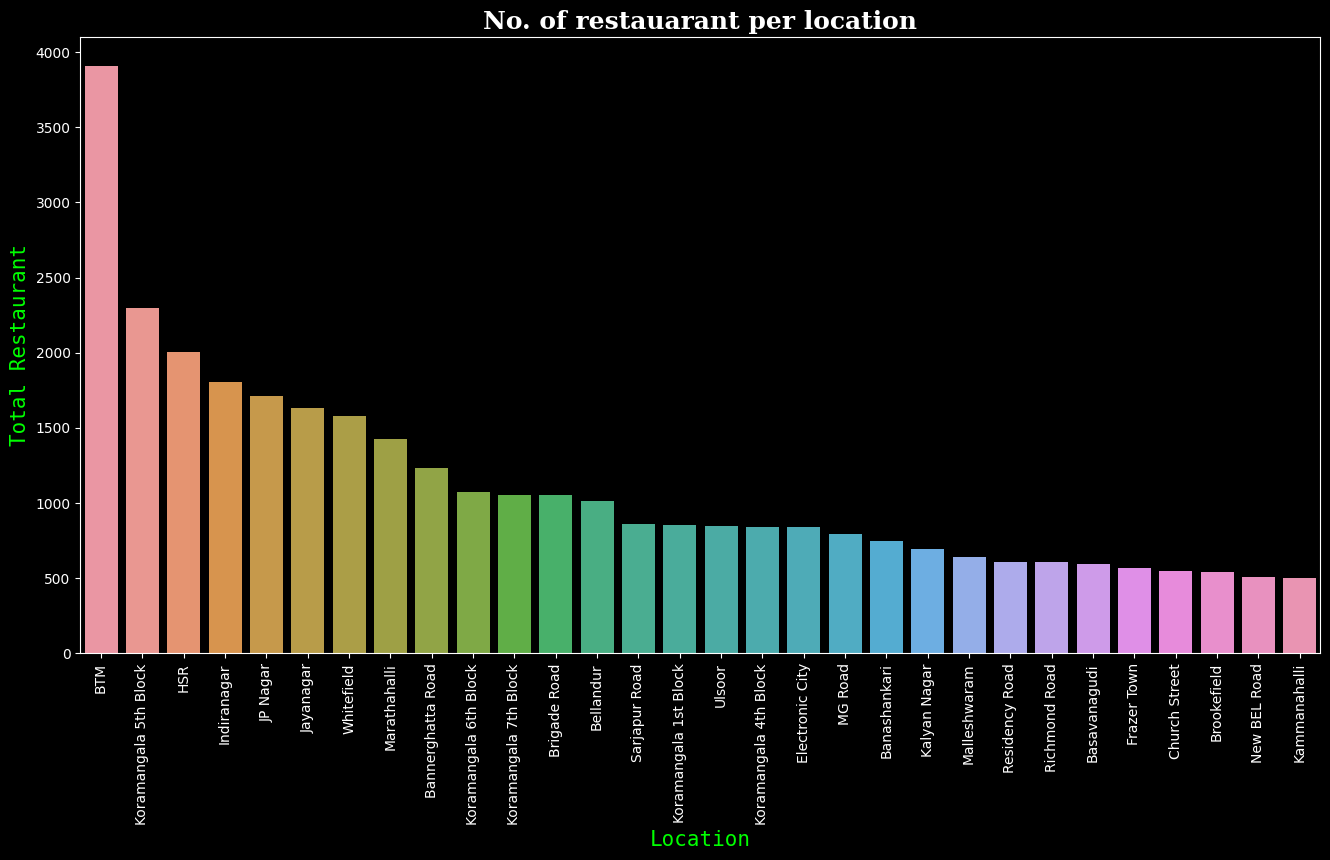

In [122]:
plt.figure(figsize=(16,8))
sns.barplot(data=df_trimed, x=df_trimed['index'], y=df_trimed['total_restaurants'] )
plt.xticks(rotation=90)
plt.xlabel("Location",fontdict=Lfont)
plt.ylabel("Total Restaurant",fontdict=Lfont)
plt.title("No. of restauarant per location", fontdict=Tfont)
plt.savefig("Plot_images\\No_of_restauarant_per_location.jpg", dpi=120)

> __BTM__ location in Bangalore has the highest numbers of restaurant.

# Type of retaurant vs Rate

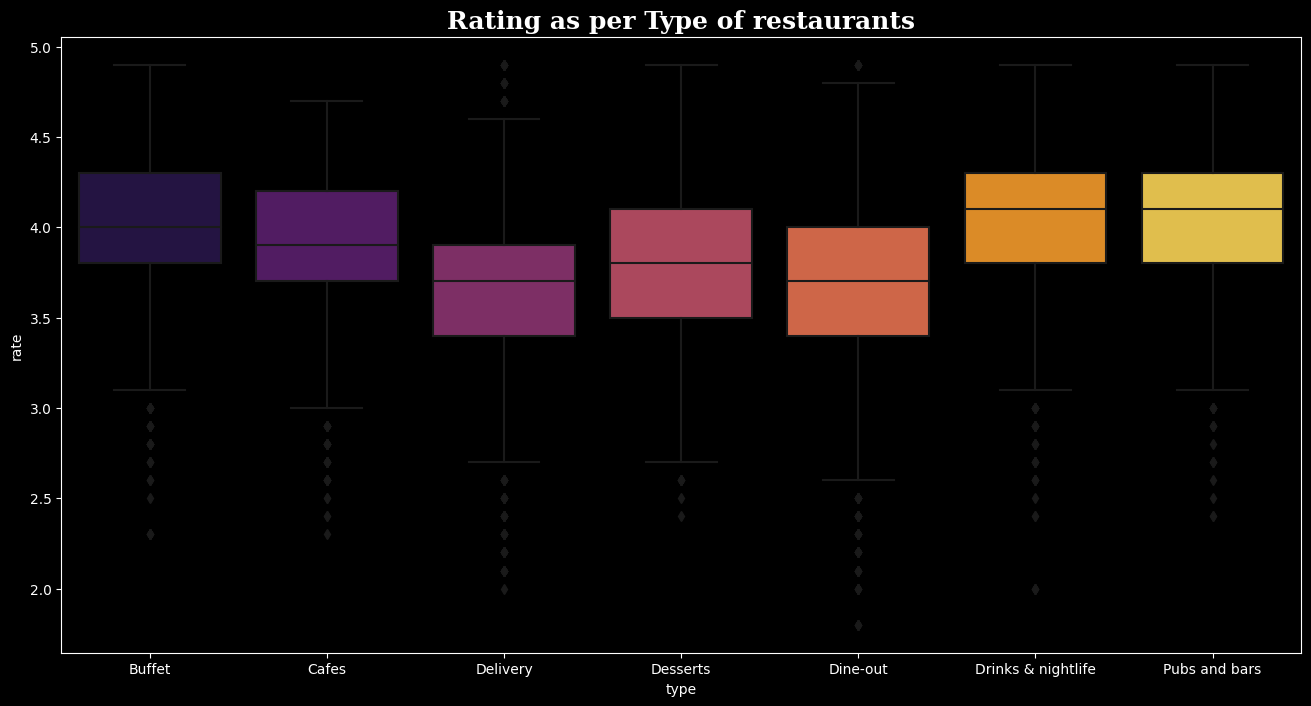

In [123]:
plt.figure(figsize=(16,8))
sns.boxplot(x='type', y='rate', data=df_clean, palette='inferno')
plt.title("Rating as per Type of restaurants", fontdict=Tfont)
plt.savefig("Plot_images\\rating_vs_typeofRestaurant.jpg",dpi=120)

> People are enjoying more __Drinks & Nightlife__ and __Pubs & bars__ type of restaurants more.

# Top cuisines in Banglore

In [124]:
df1=df_clean[['votes', "cuisines"]]
df1.drop_duplicates()
df2=df1.groupby(['cuisines'])['votes'].sum()
df2 = df2.to_frame()
df2 = df2.sort_values('votes', ascending=False)

df2.reset_index(inplace=True)
df2.drop(df2['votes'][df2['votes']<1000].index, inplace=True)


In [125]:
df2.head()

,cuisines,votes
0,North Indian,8944.001541
1,"North Indian, Chinese",7589.868691
2,South Indian,4248.822088
3,Cafe,2342.855472
4,"Bakery, Desserts",2118.917218


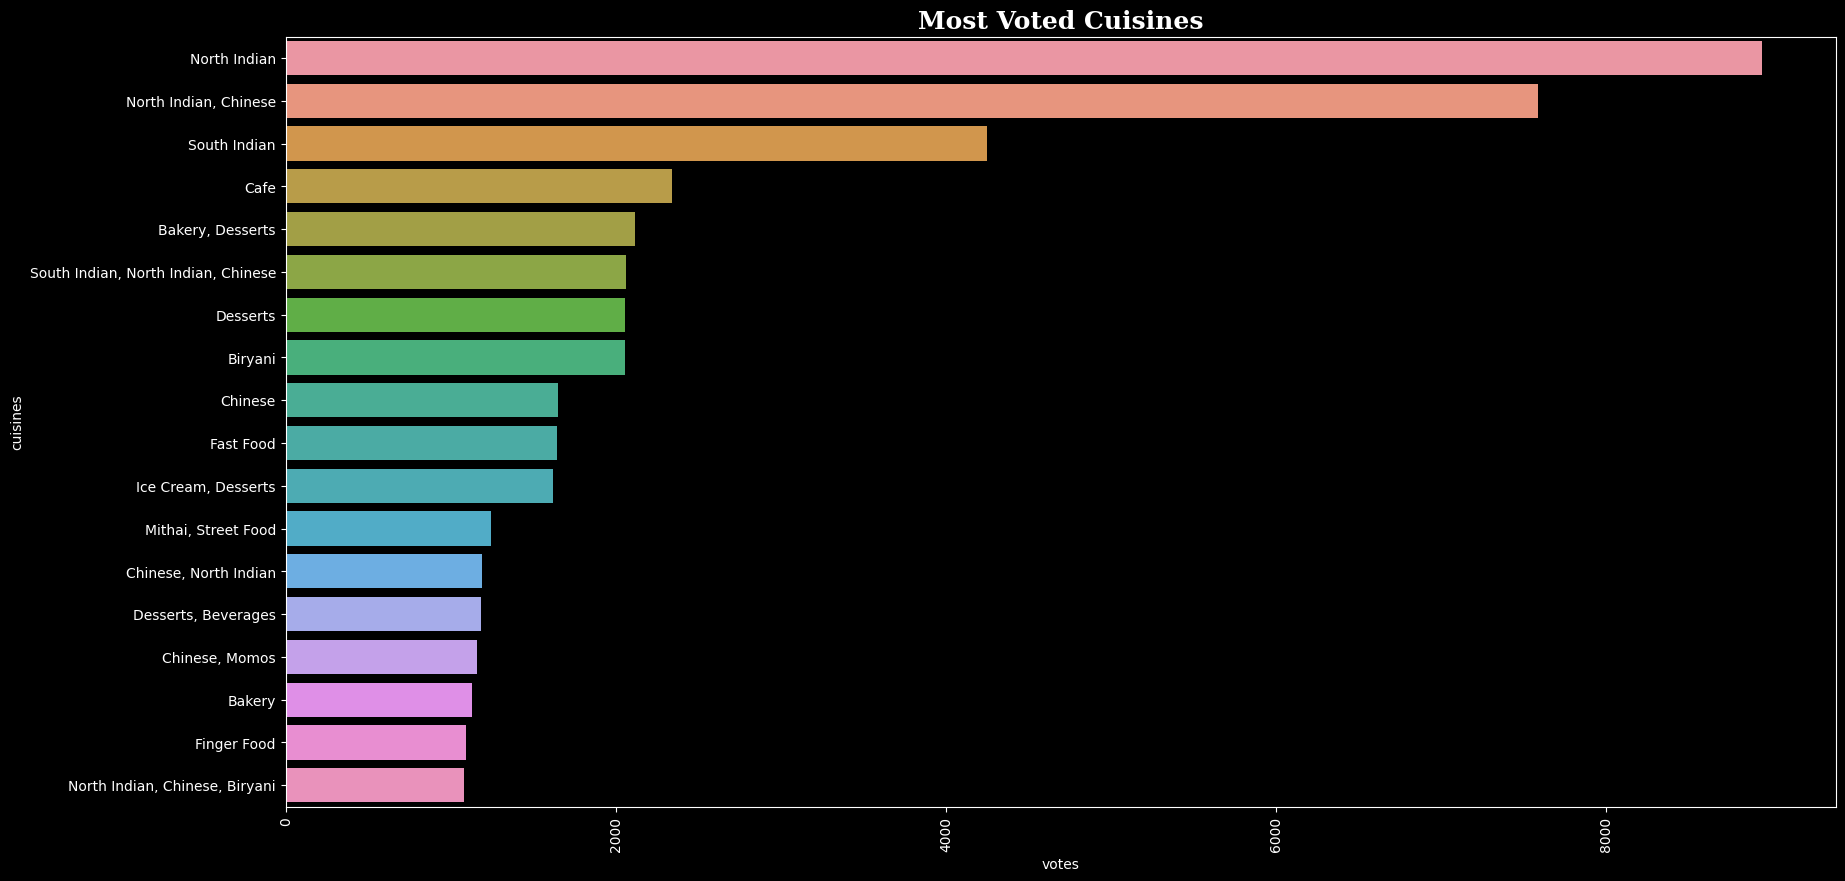

<Figure size 640x480 with 0 Axes>

In [127]:
plt.figure(figsize=(20,10))
sns.barplot(y=df2.cuisines, x=df2['votes'], orient='h')
plt.title("Most Voted Cuisines", fontdict=Tfont)
plt.xticks(rotation=90)
plt.show()
plt.savefig("Plot_images\\top10cuisines.jpg",dpi=120)

## Analyzing online_order and book_table VS rate columns

In [136]:
def plotfig(inData, colToPlot ):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    #plt.style.use('seaborn-white')
    
    fig, subPlot= plt.subplots(nrows=1, ncols=len(colToPlot), figsize=(10,6))
    fig.suptitle('countplots of : ' + str(colToPlot), fontdict=Tfont )
    
    for colName, plotNO in zip(colToPlot, range(len(colToPlot))):
        inData.groupby(colName).size().plot(kind="bar", ax=subPlot[plotNO])

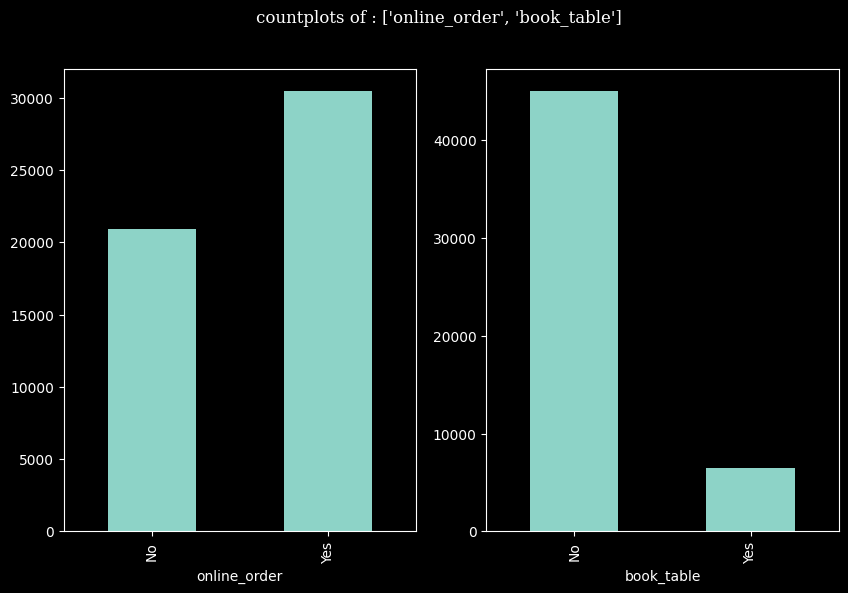

In [137]:
plotfig(inData=data, colToPlot=['online_order', 'book_table'])

### Boxplot to see relationship of online_order and book_table with rate

In [140]:
from turtle import color


colToPlot=['online_order', 'book_table']

def plotBox(inData, colToPlot ):
    
    #import matplotlib.pyplot as plt
    #%matplotlib inline
    #plt.style.use('seaborn-white')
    
    fig, subPlot= plt.subplots(nrows=1, ncols=len(colToPlot), figsize=(10,6))
    fig.suptitle('Boxplots of : ' + str(colToPlot) )
    
    for colName, plotNO in zip(colToPlot, range(len(colToPlot))):
        inData.boxplot(column='rate',by=colName , ax=subPlot[plotNO], color='red' )

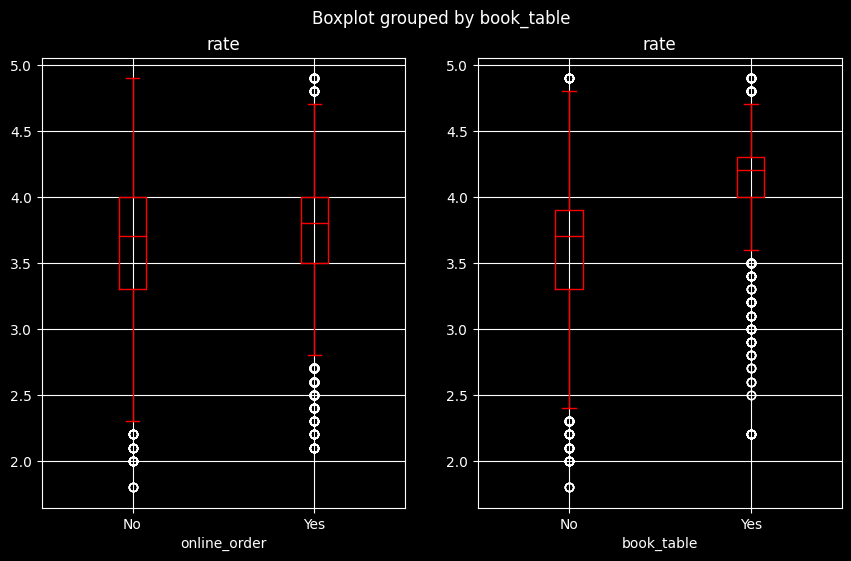

In [141]:
plotBox(inData=df_clean, colToPlot=['online_order', 'book_table'])

> From above visualization its clear both are correlated with rate but book_table shows more room for learning our model.

In [142]:
## Keeping model requirement only feature rest droping them off
## Separating traing and testing data
## taking all data with rate=NEW as testData and remaining as trainData

df_numeric = data.drop(columns=['name', 'location', 'dish_liked', 'cuisines','type'])
trainData= df_numeric[df_numeric['rate'] != "NEW"]
testData= df_numeric[df_numeric['rate'] == "NEW"]  ## Use for batch prediction

In [143]:
trainData.reset_index(drop=True, inplace=True)
testData.reset_index(drop=True, inplace=True)

In [144]:
trainData.rate = trainData.rate.astype(float)

In [145]:
## checking shape of train and test data
print(trainData.shape)
print(testData.shape)

(41418, 7)
(9953, 7)


In [146]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41418 entries, 0 to 41417
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   online_order    41418 non-null  object 
 1   book_table      41418 non-null  object 
 2   rate            41418 non-null  float64
 3   votes           41418 non-null  int64  
 4   avg_cost        41418 non-null  int32  
 5   Count_cuisines  41418 non-null  int64  
 6   Count_dishes    41418 non-null  int64  
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 2.1+ MB


In [147]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   online_order    9953 non-null   object
 1   book_table      9953 non-null   object
 2   rate            9953 non-null   object
 3   votes           9953 non-null   int64 
 4   avg_cost        9953 non-null   int32 
 5   Count_cuisines  9953 non-null   int64 
 6   Count_dishes    9953 non-null   int64 
dtypes: int32(1), int64(3), object(3)
memory usage: 505.6+ KB


# Converting binary categorical into numeric using mapping

In [148]:
## Converting Online order and book table categorical to numeric 
trainData['online_order']=trainData['online_order'].map({"Yes":1, "No":0})
trainData['book_table']=trainData['book_table'].map({"Yes":1, "No":0})

In [149]:
## Separating Target and predictor variables
target_var='rate'
predictor_var=['online_order', 'book_table', 'votes', 'avg_cost', 'Count_cuisines', 'Count_dishes']

X = trainData[predictor_var]
y = trainData[target_var]

## Correlation 

In [150]:
df_cor = trainData.corr()
df_cor

,online_order,book_table,rate,votes,avg_cost,Count_cuisines,Count_dishes
online_order,1.000000,-0.054771,0.069354,-0.008122,-0.174406,0.071342,0.095175
book_table,-0.054771,1.000000,0.426095,0.425310,0.621367,0.251275,0.436639
rate,0.069354,0.426095,1.000000,0.461115,0.390033,0.206417,0.604097
votes,-0.008122,0.425310,0.461115,1.000000,0.403590,0.239637,0.466736
avg_cost,-0.174406,0.621367,0.390033,0.403590,1.000000,0.249628,0.435821
Count_cuisines,0.071342,0.251275,0.206417,0.239637,0.249628,1.000000,0.304653
Count_dishes,0.095175,0.436639,0.604097,0.466736,0.435821,0.304653,1.000000


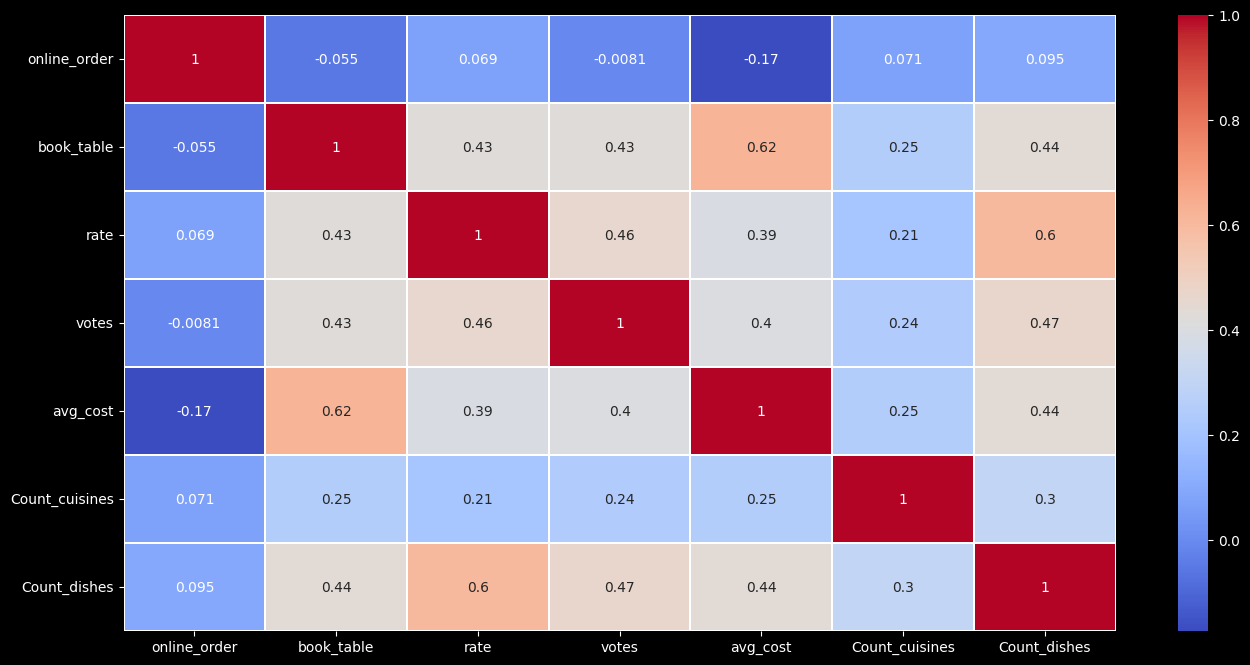

In [152]:
plt.figure(figsize=(16,8))
sns.heatmap(data=df_cor, annot=True, cmap='coolwarm', linewidths=0.3)
plt.savefig("Plot_images\\correlation_Heatmap.jpg", dpi=120)

#### __Note:__
> Here we get that highly correlated features among selected features are __votes, count_dishes, online_order, and book_table

# __DATA PREPARATION FOR MODEL__

## Data Scaling

In [153]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
#minmax=MinMaxScaler()
#X_mmscaled = minmax.fit_transform(X)   ## giving less accuracy
X_scaled=scaler.fit_transform(X)

## Train-Test split

In [154]:
## splitting trainData into train and test data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

## checking the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27750, 6)
(13668, 6)
(27750,)
(13668,)


# __Model Training__

# Model Buiding

In [155]:
## Libraries related to algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR

## Libraries related to Metric
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [156]:
## Automating Model Training 
import time

## creating empty dataframe for results of evaluation
Model_Eval= pd.DataFrame()

model_dict={"Linear_Regression":LinearRegression(), 
            "K_Nearest_Neighbour":KNeighborsRegressor(), 
            "Decision_Tree":DecisionTreeRegressor(),
            "Random_Forest":RandomForestRegressor(), 
            "AdaBoost":AdaBoostRegressor(),
            "GradientBoost":GradientBoostingRegressor(),
            "ExtraTrees":ExtraTreesRegressor(),
            "SVRegressor":SVR()
            }

for ModelName, ModelObject in model_dict.items():
    model= ModelObject
    t0=time.time()
    model.fit(X_train,y_train)
    trainingtime_fit=time.time()-t0
    
    
    ## Evaluating Models
    y_pred=model.predict(X_test)
    
    r2=r2_score(y_test, y_pred)  ## y_test = y_true
    mse=mean_squared_error(y_test, y_pred)
    mae=mean_absolute_error(y_test, y_pred)
    
    ## Appending results in dataframe
    Model_Eval=Model_Eval.append({"Model_Name":ModelName, "R2-score":r2, "MeanSquaredError":mse, "MeanAbsoluteError":mae,
                                 "Traing_time":trainingtime_fit},
                                 ignore_index=True)
    
    ## Sorting Results by r2-score
    Model_Eval.sort_values(by=["R2-score"], ascending=False, inplace=True,)
    Model_Eval.reset_index(drop=True, inplace=True)
    
    

In [157]:
Model_Eval

,MeanAbsoluteError,MeanSquaredError,Model_Name,R2-score,Traing_time
0,0.079241,0.031833,ExtraTrees,0.838218,2.924407
1,0.099463,0.033923,Random_Forest,0.827597,5.864616
2,0.086260,0.040018,Decision_Tree,0.796618,0.167272
3,0.144349,0.059898,K_Nearest_Neighbour,0.695585,0.143989
4,0.228445,0.103145,GradientBoost,0.475795,2.174300
5,0.229838,0.111040,SVRegressor,0.435669,34.757931
6,0.249267,0.115071,Linear_Regression,0.415182,0.028721
7,0.305091,0.142410,AdaBoost,0.276240,1.381217


> Based on above result considering  __R2score__  and  __time taken__  for training,  __Decision_Tree__  algoritm is selected.

# Retraining the data with best model selected

In [158]:
from sklearn.model_selection import RandomizedSearchCV
import pprint as pp

# Number of trees in ExtraTree Regressor
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(70, 150, num = 15)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 10, 12]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 5]

# Create the random grid
random_grid = { #'n_estimators':n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
pp.pprint(random_grid)             

{'max_depth': [70,
               75,
               81,
               87,
               92,
               98,
               104,
               110,
               115,
               121,
               127,
               132,
               138,
               144,
               150,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 5],
 'min_samples_split': [2, 5, 8, 10, 12]}


# Training the model with best parameter selected

In [159]:
dt = DecisionTreeRegressor()
#et = ExtraTreesRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=3, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

# Best parameters
rf_random.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 104}

# __Model Evaluation__

## Evaluating DecisionTreeRegressor Model

In [161]:
## Fuction to calculate Accuracy
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)  # Mean Absolute Percentage Error
    accuracy = 100 - mape
    print('Model Performance')
    #print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print(f'Average Error: {np.round(np.mean(errors), 4)} degrees.')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


print(f" {'='*35} Evaluation of model {'='*35}\n")

print('\n #### Base model(without hyperparameter tuning) accuracy ####\n')
base_model = DecisionTreeRegressor(random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

print('\n #### Base model(with hyperparameter tuning) accuracy ####\n')
best_tree = rf_random.best_estimator_
pred_DT = best_tree.predict(X_test)
random_accuracy = evaluate(best_tree, X_test, y_test)

## Calculation of Improvement of model due to hyperparameter tuning
print('\n #### Improvement of {:0.2f}%. ####\n\n'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))



##### Printing some sample values of prediction #####

## creating dataframe of test result
TestingDataResults=pd.DataFrame(data=X_test, columns=predictor_var)
TestingDataResults.reset_index(drop=True, inplace=True)

rating=pd.DataFrame(data=y_test)
rating.reset_index(drop=True, inplace=True)

TestingDataResults[target_var]=rating
TestingDataResults.reset_index()

TestingDataResults[('Predicted_'+target_var)]=np.round(pred_DT)

print('#### Printing sample prediction values ####')
print(TestingDataResults[[target_var,'Predicted_'+target_var]].head(10))



 =================================== Evaluation of model ===================================


 #### Base model(without hyperparameter tuning) accuracy ####

Model Performance
Average Error: 0.0863 degrees.
Accuracy = 97.48%.

 #### Base model(with hyperparameter tuning) accuracy ####

Model Performance
Average Error: 0.0843 degrees.
Accuracy = 97.54%.

 #### Improvement of 0.06%. ####


#### Printing sample prediction values ####
   rate  Predicted_rate
0   3.5             3.0
1   4.2             4.0
2   4.1             4.0
3   3.6             4.0
4   4.0             4.0
5   4.0             4.0
6   4.2             4.0
7   4.5             4.0
8   3.1             3.0
9   3.3             3.0


## Plotting Feature Importance

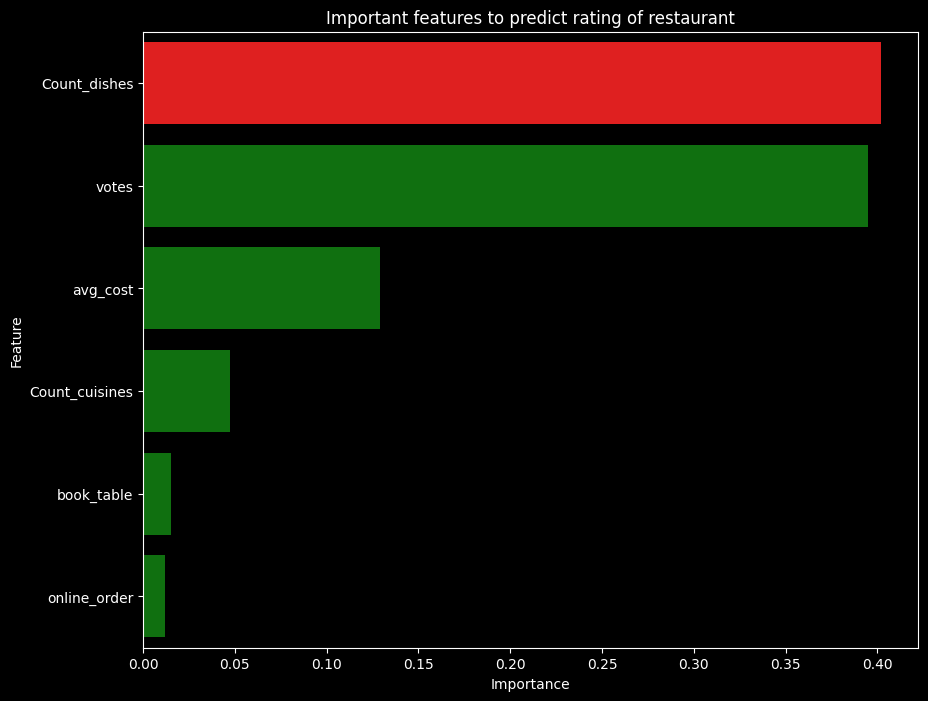

<Figure size 640x480 with 0 Axes>

In [162]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(predictor_var, best_tree.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
    
    
## converting into Dataframe
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})


values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict rating of restaurant')
plt.show()
plt.savefig("Plot_images\\Features_importance.jpg",dpi=120)

## Saving best model

In [163]:
## Serializing the model
import pickle

## file to store model
file = open('DecisionTree_model.pkl', 'wb')

## dumping information to the file
pickle.dump(best_tree, file)
file.close()

In [164]:
## End of project
print(f"{'*'*127}\n")
print(f"{'-'*61}E N D{'-'*61}\n")
print(f"{'*'*127}")

*******************************************************************************************************************************

-------------------------------------------------------------E N D-------------------------------------------------------------

*******************************************************************************************************************************


# Extra - Trying out different scenario

### ExtraTreeregressor
#### These are best param using RandomizedSearchCV
'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}
    
### result of evaluation

 =================================== Evaluation of model ===================================


 #### Base model(without hyperparameter tuning) accuracy ####

Model Performance
Average Error: 0.0863 degrees.
Accuracy = 97.48%.

 #### Base model(with hyperparameter tuning) accuracy ####

Model Performance
Average Error: 0.0789 degrees.
Accuracy = 97.68%.

 #### Improvement of 0.21%. ####


     
Index |Rate |Predicted_rate
 -----|-----|----- 
0   |3.5   | 3.0
1   |4.2   | 4.0
2   |4.1   | 4.0
3   |3.6   | 4.0
4   |4.0   | 4.0
5   |4.0   | 4.0
6   |4.2   | 4.0
7   |4.5   | 4.0
8   |3.1   | 3.0
9   |3.3   | 3.0

> Not considering ExtraTreeRegressor because it takes too much time similar to RandomForestRegressor

# Checking Model performance by adding different features and improving distribution

In [ ]:
# Creating Alternate Dataframe
target_var='rate'
predictor_var=['online_order', 'book_table', 'votes', 'avg_cost', 'Count_cuisines', 'Count_dishes']

Alternate_df=trainData.drop(trainData['votes'][trainData['votes']==0].index)
Alternate_df.reset_index(inplace=True, drop=True)

X1= Alternate_df[predictor_var]
y1= Alternate_df[target_var]



In [ ]:
Alternate_df

,online_order,book_table,rate,votes,avg_cost,Count_cuisines,Count_dishes
0,Yes,Yes,4.1,775,800,3,7
1,Yes,No,4.1,787,800,3,7
2,Yes,No,3.8,918,800,3,7
3,No,No,3.7,88,300,2,1
4,No,No,3.8,166,600,2,2
...,...,...,...,...,...,...,...
41394,No,No,3.7,34,800,2,0
41395,No,No,2.5,81,800,4,2
41396,No,No,3.6,27,1500,1,0
41397,No,Yes,4.3,236,2500,1,3


In [ ]:
## Coverting restaurant_type into numerical by using dummy_variable 
#X1["restaurant_type"] = data['type']
#typeOfRestaurant = pd.get_dummies(X1['restaurant_type'], prefix ='type', drop_first=True )
#X1 = pd.concat([X1, typeOfRestaurant], axis=1)
#X1.drop(columns='restaurant_type',inplace=True, axis=1 )

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41399 entries, 0 to 41398
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   online_order    41399 non-null  object
 1   book_table      41399 non-null  object
 2   votes           41399 non-null  int64 
 3   avg_cost        41399 non-null  int32 
 4   Count_cuisines  41399 non-null  int64 
 5   Count_dishes    41399 non-null  int64 
dtypes: int32(1), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
## Converting Online order and book table categorical to numeric 
X1['online_order']=X1['online_order'].map({"Yes":1, "No":0})
X1['book_table']=X1['book_table'].map({"Yes":1, "No":0})

In [ ]:
X1.head()

,online_order,book_table,votes,avg_cost,Count_cuisines,Count_dishes
0,1,1,775,800,3,7
1,1,0,787,800,3,7
2,1,0,918,800,3,7
3,0,0,88,300,2,1
4,0,0,166,600,2,2


#  ************* Improving_Distribution ************

In [ ]:
## Applying boxcox transformation
from scipy.stats import boxcox
bxc_votes = boxcox(X1['votes'], 0.0)
bxc_avg_cost = boxcox(X1['avg_cost'], 0.0)
X1['votes']= bxc_votes
X1['avg_cost']= bxc_avg_cost

In [ ]:
## Calculating Skewdness and how heavily the outliers are
## skewness and heaviness along the index axis
def CalcSkew(dataframe):
    Skew_values = dataframe.skew(axis = 0)
    kurtosis_value = dataframe.kurtosis(axis =0)
    d = {"Skewness":Skew_values, "Kurtosis":kurtosis_value}
    df_SkewCalc = pd.DataFrame(d,index=predictor_var)
    return df_SkewCalc



In [ ]:
CalcSkew(dataframe=X)

,Skewness,Kurtosis
online_order,-0.660844,-1.563361
book_table,1.936470,1.750000
votes,4.941020,30.960612
avg_cost,2.149018,6.022955
Count_cuisines,1.025984,1.429117
Count_dishes,0.256961,-1.755020


> __Note__:
1. __Votes and Avg_cost__ both show __high positive skewness__.
    
2. And also __Votes and Avg_cost__ both show __high kurtosis__ value i.e. distribution is too much flat wrt. normal  distribution.

In [ ]:
CalcSkew(X1)

,Skewness,Kurtosis
online_order,-0.660559,-1.563737
book_table,1.936498,1.750109
votes,0.253744,-0.658575
avg_cost,0.184950,-0.075470
Count_cuisines,1.024649,1.424984
Count_dishes,0.256445,-1.755288


Text(0.5, 1.0, 'Distribution of Restaurant Votes')

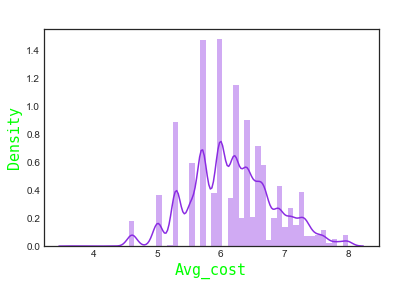

In [ ]:
#plt.subplot(nrows=1, ncols=2, figsize=(12,8))
sns.distplot(bxc_avg_cost, color='blueviolet')
plt.xlabel("Avg_cost", fontdict=Lfont)
plt.ylabel("Density", fontdict=Lfont)
plt.title("Distribution of Restaurant Votes", fontdict=Tfont)

Text(0.5, 1.0, 'Distribution of Restaurant Votes')

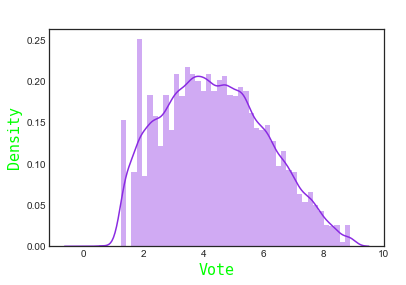

In [ ]:
sns.distplot(bxc_votes, color='blueviolet')
plt.xlabel("Vote", fontdict=Lfont)
plt.ylabel("Density", fontdict=Lfont)
plt.title("Distribution of Restaurant Votes", fontdict=Tfont)

### Standard Scaling

In [ ]:
std_scale=StandardScaler()              # standard scaling
X1_scaled = std_scale.fit_transform(X1)   

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.33, random_state=42)

# declaring Decision tree object
tree=DecisionTreeRegressor(min_samples_split= 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 75)

In [ ]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 75,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
tree.fit(X1_train, y1_train)
predict_dt=tree.predict(X1_test)



In [ ]:
print('\n #### Best model(with hyperparameter tuning) accuracy ####\n')
best_tree = rf_random.best_estimator_
pred_DT = best_tree.predict(X_test)
random_accuracy = evaluate(best_tree, X_test, y_test)
print("R2_score: ",r2_score(y_test, pred_DT))

print('\n #### model accuracy after some improving distribution ####\n')
change_accuracy = evaluate(tree, X1_test, y1_test)
print("R2_score: ",r2_score(y1_test, predict_dt))


## Calculation of Improvement of model due to hyperparameter tuning
print('\n #### Improvement of {:0.2f}%. ####\n\n'.format( 100 * (change_accuracy - random_accuracy) / random_accuracy))



 #### Best model(with hyperparameter tuning) accuracy ####

Model Performance
Average Error: 0.083 degrees.
Accuracy = 97.57%.
R2_score:  0.8031644709515824

 #### model accuracy after some improving distribution ####

Model Performance
Average Error: 0.0811 degrees.
Accuracy = 97.64%.
R2_score:  0.8131937390115294

 #### Improvement of 0.07%. ####




> __Droping idea__ of adding more feature as performance of above model is reducing.

> __Accepting__ transforming distribution of votes and avg_cost(log-normal to normal) because of increasing the performance. 

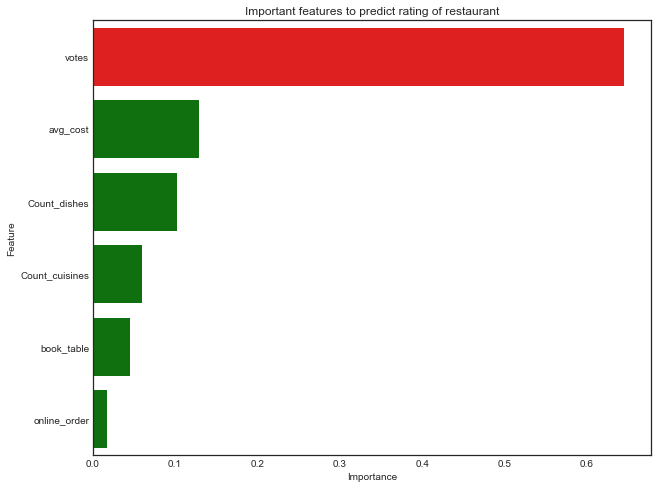

In [ ]:
# let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(predictor_var, tree.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
    
    
## converting into Dataframe
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})


values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict rating of restaurant')
plt.show()

In [ ]:
## Checking for ExtraTreeRegressor

In [ ]:
etr = ExtraTreesRegressor(n_estimators= 400, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None)
etr.fit(X1_train, y1_train)
predict_etr=etr.predict(X1_test)

In [ ]:
print('\n #### DecisionTree model(with hyperparameter tuning) accuracy ####\n')

tree_accuracy = evaluate(tree, X1_test, y1_test)
print("R2_score: ",r2_score(y1_test, predict_dt))

print('\n #### ExtraTreesReg model accuracy  ####\n')
etr_accuracy = evaluate(etr, X1_test, y1_test)
print("R2_score: ",r2_score(y1_test, predict_etr))


## Calculation of Improvement of model due to hyperparameter tuning
print('\n #### Improvement of {:0.2f}%. ####\n\n'.format( 100 * (etr_accuracy - tree_accuracy) / tree_accuracy))



 #### DecisionTree model(with hyperparameter tuning) accuracy ####

Model Performance
Average Error: 0.0811 degrees.
Accuracy = 97.64%.
R2_score:  0.8131937390115294

 #### ExtraTreesReg model accuracy  ####

Model Performance
Average Error: 0.0766 degrees.
Accuracy = 97.76%.
R2_score:  0.8530775755427312

 #### Improvement of 0.12%. ####


